# Comparison of ARIMA implementations in python

Following notebook shall explore different implementations of ARIMA models in python.

In [16]:
#statsmodels
#pycaret

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

sns.set(rc={'figure.figsize':(6, 5)})
sns.set_style('darkgrid', {'axes.linewidth': 2, 'axes.edgecolor':'black'})

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [18]:
# Import dataset
train = pd.read_csv(r'dataset\DailyDelhiClimateTrain.csv')
test = pd.read_csv(r'dataset\DailyDelhiClimateTest.csv')

train['date'] = pd.to_datetime(train['date'])
train.set_index('date', inplace=True)

# Mean temperature

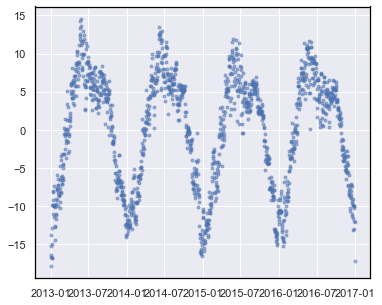

In [19]:
# Remove trend

from scipy import signal

temp_d = signal.detrend(train['meantemp'].values)
#plt.plot(train.index.strftime('%Y-%m'), temp_d, linestyle='None', alpha=0.4, marker='.')
plt.plot(train.index.values, temp_d, linestyle='None', alpha=0.5, marker='.')
#plt.set_title('meantemp', fontname="Times New Roman", size=20, fontweight="bold");

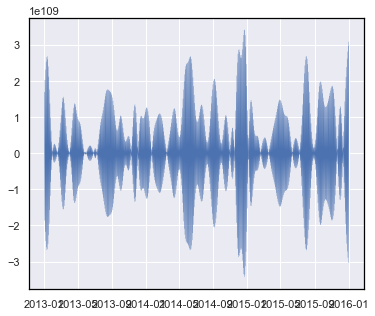

In [20]:
# Remove seasonality

temp_d12 = np.diff(temp_d, 365)
plt.plot(train.index[:-365], temp_d12, linewidth=0.3);

In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(temp_d12, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -142.157470
p-value: 0.000000


# StatsModels

# PMDArima

In [22]:
from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(train.meantemp.values, start_p=1, start_q=1,
                            max_p=10, max_q=10, start_P=0, seasonal=False,
                            d=0, D=0, max_order=10, with_intercept=True,
                            trace=True, 
                            error_action='ignore',  # don't want to know if an order does not work
                            suppress_warnings=True,  # don't want convergence warnings
                            stepwise=False)  # Stepwise at false for grid-search

 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9983.725, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8469.027, Time=0.13 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=7528.393, Time=0.20 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=7002.507, Time=0.39 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=6682.293, Time=0.59 sec
 ARIMA(0,0,5)(0,0,0)[0] intercept   : AIC=6484.283, Time=0.73 sec
 ARIMA(0,0,6)(0,0,0)[0] intercept   : AIC=6329.897, Time=0.84 sec
 ARIMA(0,0,7)(0,0,0)[0] intercept   : AIC=6248.609, Time=1.01 sec
 ARIMA(0,0,8)(0,0,0)[0] intercept   : AIC=6121.374, Time=1.17 sec
 ARIMA(0,0,9)(0,0,0)[0] intercept   : AIC=6037.565, Time=1.57 sec
 ARIMA(0,0,10)(0,0,0)[0] intercept   : AIC=6011.498, Time=1.90 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5643.032, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5602.211, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5577.976, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=5548.705, Time=0.42 sec
 ARIMA(1,

# Pycaret
https://pycaret.readthedocs.io/en/time_series/api/time_series.html

# Comparison

In [23]:
x = 10
arima_grid = np.array(np.meshgrid(range(x), 0, range(x))).T.reshape(-1,3)

# Model order max of 10
arima_grid = arima_grid[np.sum(arima_grid, axis = 1)<11]

In [24]:
from statsmodels.tsa.arima.model import ARIMA

def model_aic(dt, parameters):
    """
    Create ARIMA model and return corresponding AIC score.
    """
    model = ARIMA(dt, order=parameters)
    model_fit = model.fit(method_kwargs={"warn_convergence": False})
    
    return model_fit.aic

aics = np.hstack((arima_grid, np.zeros((arima_grid.shape[0], 1))))
for i, parameters in enumerate(arima_grid):
    aics[i,3] = model_aic(train.meantemp.values, parameters)

aics = pd.DataFrame(aics)

C:\Users\andre\venv\ts_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\andre\venv\ts_env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [25]:
aics.sort_values(3).head()

,0,1,2,3
48,4.0,0.0,5.0,5525.932485
47,3.0,0.0,5.0,5546.701829
30,1.0,0.0,3.0,5548.704623
31,2.0,0.0,3.0,5548.747078
38,1.0,0.0,4.0,5549.102134
